# Finding maximum margin( for y-distance) seperating line for balck and white points on a 2d plane

## import libs

In [14]:
# Import libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


## get input

### generate random points

In [15]:
# np.random.seed(2)
n = 5 # number of points
m=0
# X = np.random.randn(n, 2) # coordinates of points
# y = np.random.choice([-1, 1], n) # labels of points (white or black)


### use hard coded data

In [16]:
# np.random.seed(2)
n = 5 # number of points
m=6
# X = np.random.randn(n, 2) # coordinates of points
# y = np.random.choice([-1, 1], n) # labels of points (white or black)


X=[[2.31, 7.34], [2.39, 7.11], [3.25, 11.09], [3.29, 7.96], [3.71, 10.79], [1.0, 2.52], [2.71, 1.97], [4.3, 6.29], [5.05, 2.83], [7.07, 7.3], [9.78, 7.77]]
# y=[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]
y=[-1,-1,-1,-1,-1,1,1,1,1,1,1]
X=np.array(X)
y=np.array(y)


### input from user

In [17]:
# # get n and m from the first line
# n, m = map(int, input().split())

# # initialize X and y arrays
# X = []
# Y = []

# # loop over n lines and get white points
# for i in range(n):
#   # get two floats for x and y coordinates
#   x, y = map(float, input().split())
#   # append the coordinates to X array
#   X.append([x, y])
#   # append the color to y array (0 for white)
#   Y.append(1)

# # loop over m lines and get black points
# for i in range(m):
#   # get two floats for x and y coordinates
#   x, y = map(float, input().split())
#   # append the coordinates to X array
#   X.append([x, y])
#   # append the color to y array (1 for black)
#   Y.append(-1)

## solve problem

In [18]:
# Define the optimization variables
a = cp.Variable() # slope of the separating line
b = cp.Variable() # intercept of the separating line
t = cp.Variable() # margin

# Define the objective function
objective = cp.Maximize(t)
# Define the constraints
constraints = [y[i] * (a * X[i, 0] + b-X[i,1]) >= t for i in range(n+m)] # points should be on the correct side of the line with a margin of at least t

# Define and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()


1.411924244828369

## results

In [19]:

# Print the optimal values
print("The optimal slope is", a.value)
print("The optimal intercept is", b.value)
print("The optimal margin is", t.value)


The optimal slope is 1.1424242408032663
The optimal intercept is 2.789500005670313
The optimal margin is 1.411924244828369


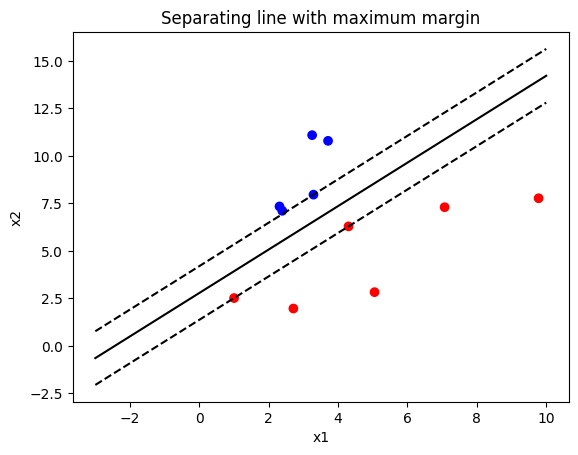

(1.1424,2.7895)


In [20]:

# Plot the points and the separating line
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
x1 = np.linspace(-3, 10, 100) # x-coordinates for plotting the line
x2 = a.value * x1 + b.value # y-coordinates for plotting the line
m1_x2= a.value * x1 + b.value-t.value # y-coordinates for plotting the line margin
m2_x2=a.value * x1 + b.value+t.value # y-coordinates for plotting the line margin
plt.plot(x1, x2, "k-")
plt.plot(x1, m1_x2, "k--")
plt.plot(x1, m2_x2, "k--")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Separating line with maximum margin")
plt.show()
print("({:.4f},{:.4f})".format(a.value, b.value))
